# LOADING LIBRARIES

In [2]:
# Importing library
library(ggplot2)
library(dplyr)

NameError: name 'library' is not defined

# LOADING DATA

In [107]:
#Loading data
data <- read.csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv', sep = ',')

In [108]:
#Data shape
dim(data)

[1] 14797     9

In [109]:
#Data glimps
head(data)

,age,workclass,education,marital.status,occupation,sex,capital.gain,capital.loss,income
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
3,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
4,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
5,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
6,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K


In [110]:
#Data type
sapply(data, class)

age      workclass      education marital.status     occupation 
     "integer"    "character"      "integer"    "character"    "character" 
           sex   capital.gain   capital.loss         income 
   "character"      "integer"      "integer"    "character"

In [111]:
#Checking value counts in workclass feature
table(data$workclass)


               ?      Federal-gov        Local-gov     Never-worked 
             829              454              969                5 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           10281              498             1170              586 
     Without-pay 
               5 

In [112]:
#Replacing missing values with most frequent value
data[data=='?']<-'Private'

In [113]:
#Checking value counts in workclass feature
table(data$workclass)


     Federal-gov        Local-gov     Never-worked          Private 
             454              969                5            11110 
    Self-emp-inc Self-emp-not-inc        State-gov      Without-pay 
             498             1170              586                5 

# CREATE A CONTINGENCY TABLE OF WORKCLASS AND SEX, AND PLOT IT


### CONTINGENCY TABLE:WORKCLASS AND SEX

In [114]:
#Creating contingency table for workclass and sex
c_table1 = table(data$workclass, data$sex)
c_table2 = prop.table(table(data$workclass, data$sex), margin=2)*100
colnames(c_table2) <- c("Female_%", "Male_%")
c_table_comb = data.frame(cbind(c_table1, c_table2))
c_table_comb

,Female,Male,Female_.,Male_.
,<dbl>,<dbl>,<dbl>,<dbl>
Federal-gov,149,305,3.03338762,3.08548306
Local-gov,377,592,7.67508143,5.98887203
Never-worked,1,4,0.02035831,0.04046535
Private,3951,7159,80.43566775,72.42286292
Self-emp-inc,54,444,1.09934853,4.49165402
Self-emp-not-inc,178,992,3.62377850,10.03540718
State-gov,201,385,4.09201954,3.89479009
Without-pay,1,4,0.02035831,0.04046535


### PLOT: WORKCLASS AND SEX

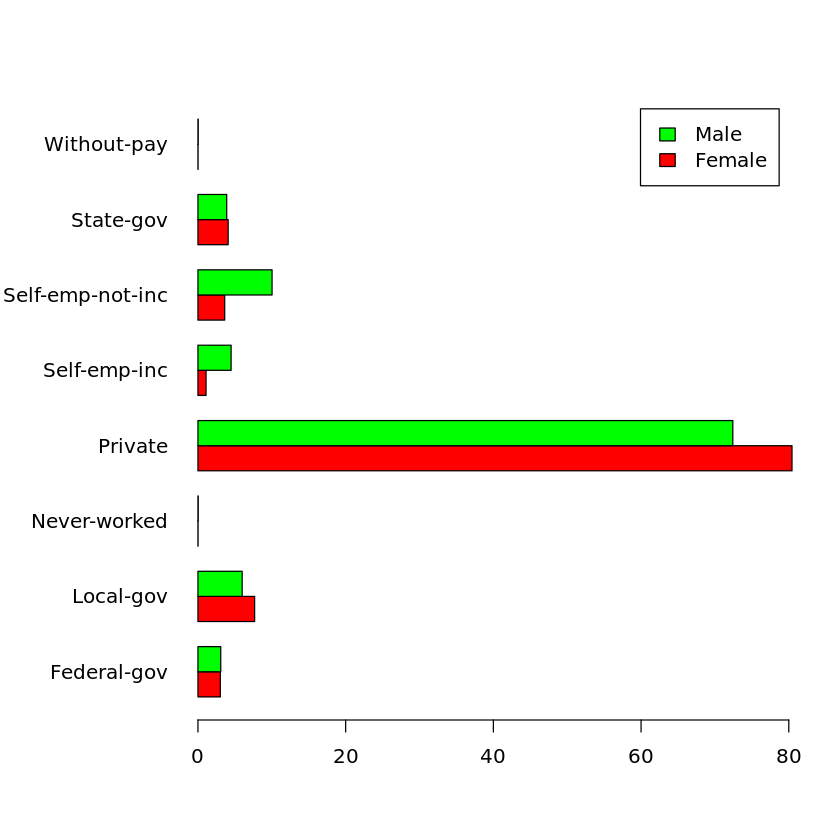

In [115]:
#Creating barplot on workclass and sex
par(mar=c(5,8,4,2))
name = c('Federal-gov','Local-gov','Never-worked','Private','Self-emp-inc','Self-emp-not-inc','State-gov',
         'Without-pay')
c_tab = prop.table(table(data$sex,data$workclass),margin = 1)*100
barplot(c_tab,
        legend=T, 
        col = c('red','green'),
        horiz = T,
        beside = T, 
        names.arg = name, 
        las=1)

### SUMMARY PONTS: WORKCLASS AND SEX

- In female gender, 80% are working in private companies and 20% are wokring in other than private companies
- in male gender, 72% are working in private companies and 28% are wokring in other than private companies
- The data have maximum records for private workingclass

# CREATE A CONTINGENCY TABLE OF SEX AND MARITAL STATUS, AND PLOT IT

### CONTINGENCY TABLE:MARITAL STATUS AND SEX

In [116]:
#Creating contingency table for marital status and sex
c_table3 = table(data$marital.status, data$sex)
c_table4 = prop.table(table(data$marital.status, data$sex), margin=2)*100
colnames(c_table4) <- c("Female_%", "Male_%")
c_table_comb2 = data.frame(cbind(c_table3, c_table4))
c_table_comb2

,Female,Male,Female_.,Male_.
,<dbl>,<dbl>,<dbl>,<dbl>
Divorced,1219,795,24.8167752,8.04248862
Married-AF-spouse,7,4,0.1425081,0.04046535
Married-civ-spouse,761,6010,15.4926710,60.79919069
Married-spouse-absent,95,104,1.9340391,1.05209914
Never-married,2160,2717,43.9739414,27.48609004
Separated,290,182,5.9039088,1.84117350
Widowed,380,73,7.7361564,0.73849267


### PLOT: MARITAL STATUS AND SEX

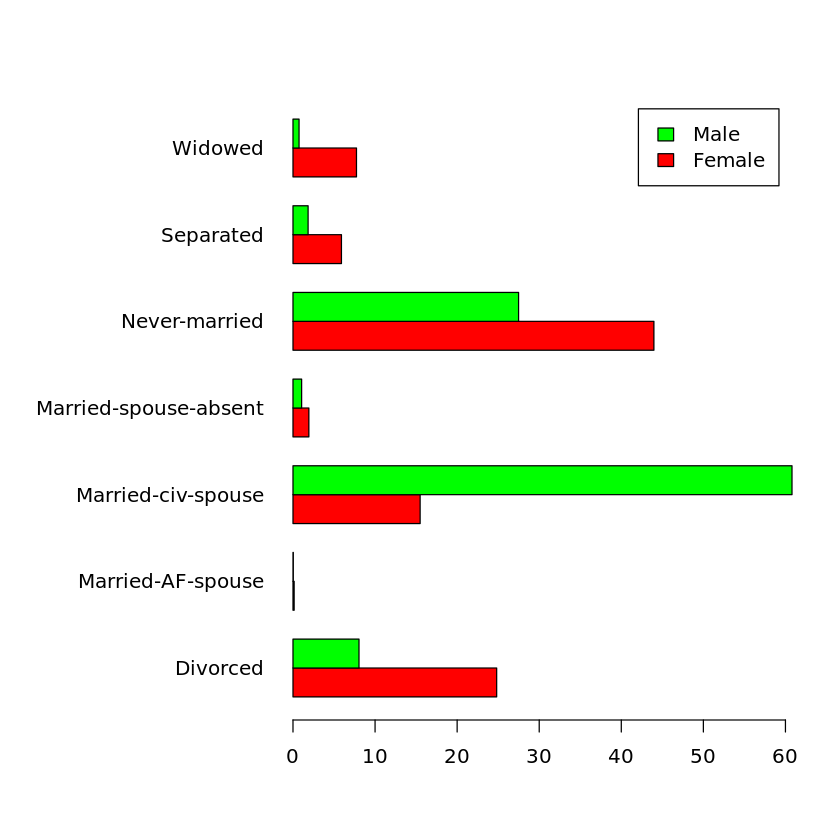

In [117]:
#Creating barplot on marital status and sex
par(mar=c(5,12,4,2))
name = c('Divorced','Married-AF-spouse','Married-civ-spouse','Married-spouse-absent',
         'Never-married','Separated','Widowed')
c_tab = prop.table(table(data$sex,data$marital.status),margin = 1)*100
barplot(c_tab,
        legend=T, 
        col = c('red','green'),
        horiz = T,
        beside = T, 
        names.arg = name, 
        las=1)

### SUMMARY PONTS: MARITAL STATUS AND SEX

- In female gender, 44% are never married females and 25% are divorced females
- In male gender, 61% are married-civilian-spouse males and 27% are never married males
- The data have maximum records for married-civilian-spouse, never married and divorced marital status

# CREATING NEW DATAFRAME: ADULTOVER40

In [118]:
#Filter data where age above 40
adultOver40 <-data[which(data$age>40),]

In [119]:
#Data glimps
head(adultOver40)

,age,workclass,education,marital.status,occupation,sex,capital.gain,capital.loss,income
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
3,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
4,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
8,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
9,54,Private,10,Married-civ-spouse,Private,Male,0,0,>50K
17,44,Private,14,Divorced,Exec-managerial,Female,0,0,<=50K


# RECREATE THE CONTINGENCY TABLE OF SEX AND MARITAL STATUS FOR ADULTOVER40.

### CONTINGENCY TABLE ON ADULTOVER40:MARITAL STATUS AND SEX

In [120]:
#Creating contingency table for marital status and sex age above 40
c_table5 = table(adultOver40$marital.status, adultOver40$sex)
c_table6 = prop.table(table(adultOver40$marital.status, adultOver40$sex), margin=2)*100
colnames(c_table6) <- c("Female_%", "Male_%")
c_table_comb3 = data.frame(cbind(c_table5, c_table6))
c_table_comb3

,Female,Male,Female_.,Male_.
,<dbl>,<dbl>,<dbl>,<dbl>
Divorced,720,448,39.867110,10.327340
Married-civ-spouse,305,3383,16.888151,77.985247
Married-spouse-absent,38,47,2.104097,1.083449
Never-married,256,315,14.174972,7.261411
Separated,133,74,7.364341,1.705855
Widowed,354,71,19.601329,1.636699


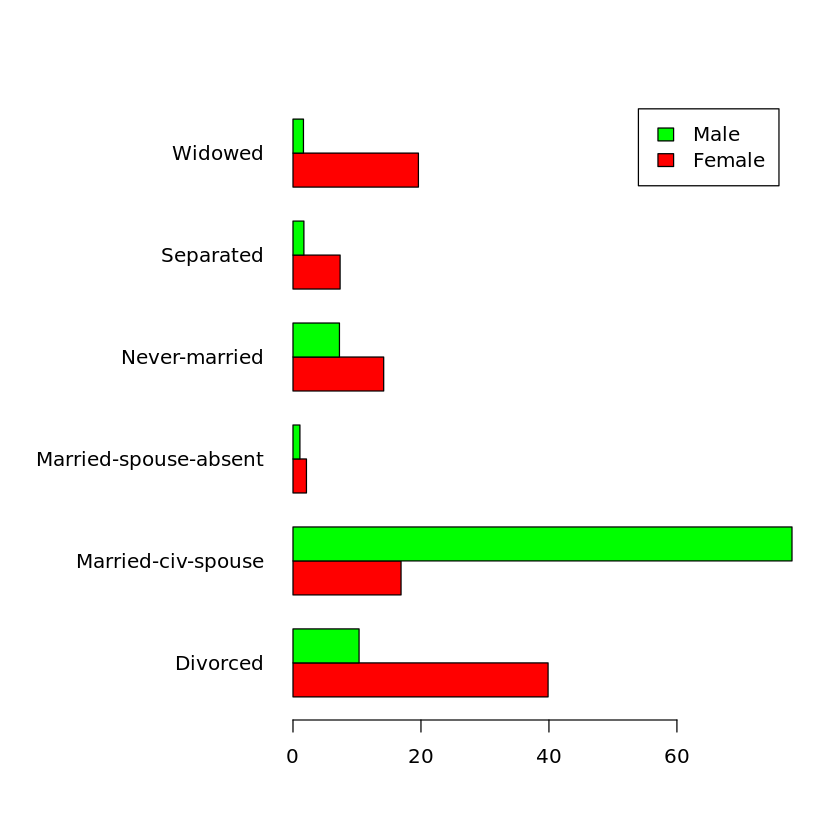

In [121]:
par(mar=c(5,12,4,2))
name = c('Divorced','Married-civ-spouse','Married-spouse-absent','Never-married','Separated','Widowed')
c_tab = prop.table(table(adultOver40$sex,adultOver40$marital.status),margin = 1)*100
barplot(c_tab,
        legend=T,
        col = c('red','green'),
        horiz = T,
        beside = T, 
        names.arg = name, 
        las=1)

### SUMMARY POINTS ON ADULTOVER40: MARITAL STATUS AND SEX

- In male over 40 age, 78% male are married civilian spouse status and 10% are divorced status, It means the data have maximum records for married-civilian-spouse
- In female over 40 age, 40% females have divorced status, 20% are widowed status & 14% females are still single , It means the data have maximum records for Divorced, Widowed & never married

# OUTLIERS DETECTION: EDUCATION

### DETECTING OUTLIERS USING Z-SCORE ON EDUCATION

In [122]:
#Computing zscore for education feature
z_score = abs((data$education - mean(data$education))/sd(data$education))
head(z_score)

[1] 1.1281245 0.4113455 1.9508155 0.4113455 1.5129920 0.3583895

In [123]:
#Extracting an outliers where zscore is greater than 3
outliers<-data.frame(data$education,z_score)
outliers$is.outliers <- ifelse(outliers$z_score>3,'Outliers','Not Outliers')

In [124]:
#Data glimps
head(outliers)

,data.education,z_score,is.outliers
,<int>,<dbl>,<chr>
1,13,1.1281245,Not Outliers
2,9,0.4113455,Not Outliers
3,5,1.9508155,Not Outliers
4,9,0.4113455,Not Outliers
5,14,1.5129920,Not Outliers
6,11,0.3583895,Not Outliers


In [125]:
#Checking counts of outliers and not outliers for education feature
table(outliers$data.education, outliers$is.outliers)

    
     Not Outliers Outliers
  1             0       24
  2             0       89
  3           156        0
  4           283        0
  5           263        0
  6           423        0
  7           534        0
  8           183        0
  9          4777        0
  10         3323        0
  11          599        0
  12          478        0
  13         2405        0
  14          788        0
  15          266        0
  16          206        0

### SUMMARY POINTS ON DETECTING OUTLIERS USING Z-SCORE ON EDUCATION

- We have detected 113 rows have an outliers in education features in which eduction has been mentioned as 1st and 2nd standard

### DETECTING OUTLIERS USING IQR RANGE METHOD ON EDUCATION

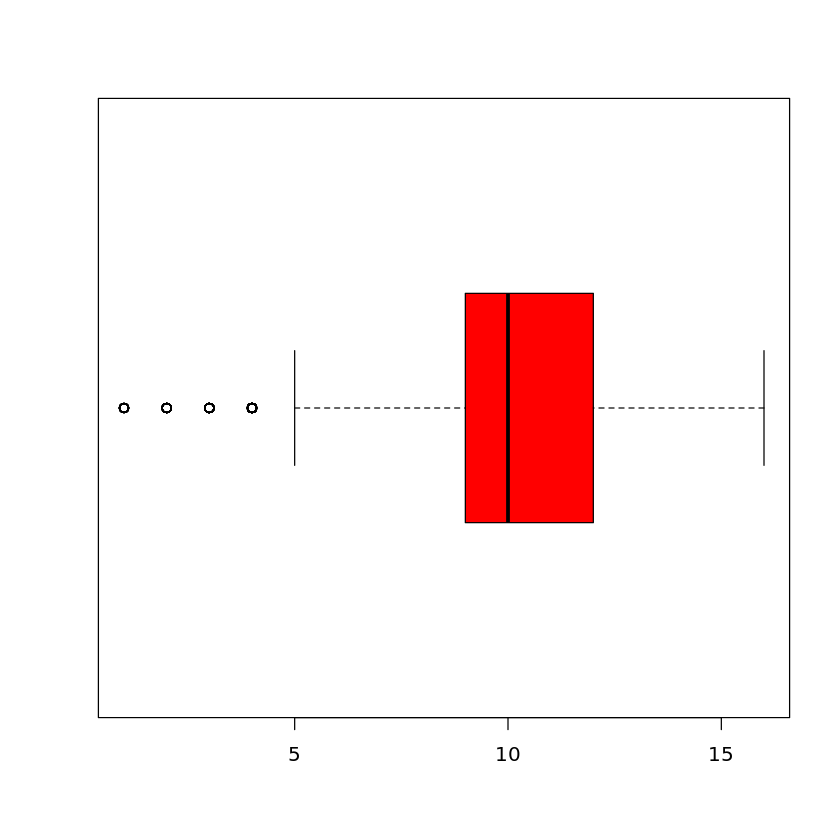

In [126]:
#Plotting boxplot in education feature
boxplot(data$education,horizontal = T, col='red')

In [127]:
#Extracting an outliers from lower bound and upper bound using IQR methods
q1 <- quantile(data$education, 0.25)
q3 <- quantile(data$education, 0.75)
iqr <- q3 - q1
Outliers_lower_bound <- data$education[data$education<(q1-(1.5*iqr))]
Outliers_upper_bound <- data$education[data$education>(q3+(1.5*iqr))]

In [128]:
#Checking count of an outliers from lower bound
length(Outliers_lower_bound)

[1] 552

In [129]:
#Checking count of an outliers from uuper bound
length(Outliers_upper_bound)

[1] 0

In [130]:
#Value count of education feature have an outliers
table(Outliers_lower_bound)

Outliers_lower_bound
  1   2   3   4 
 24  89 156 283 

### SUMMARY POINTS ON DETECTING OUTLIERS USING IQR RANGE METHOD ON EDUCATION

- We have detected 552 rows as an outliers in education feature using IQR range method
- Standard 1st, 2nd, 3rd & 4th are the values have in the education feature which are an outliers

# OUTLIERS DETECTION: AGE

### DETECTING OUTLIERS USING Z-SCORE ON AGE

In [78]:
#Computing zscore for education feature
z_score = abs((data$age - mean(data$age))/sd(data$age))
head(z_score)

[1] 0.82700980 0.05025535 0.75390437 0.97322066 0.56199336 0.09595551

In [79]:
#Extracting an outliers where zscore is greater than 3
outliers<-data.frame(data$age,z_score)
outliers$is.outliers <- ifelse(outliers$z_score>3,'Outliers','Not Outliers')

In [80]:
#Data glimps
head(outliers)

,data.age,z_score,is.outliers
,<int>,<dbl>,<chr>
1,50,0.82700980,Not Outliers
2,38,0.05025535,Not Outliers
3,49,0.75390437,Not Outliers
4,52,0.97322066,Not Outliers
5,31,0.56199336,Not Outliers
6,40,0.09595551,Not Outliers


In [81]:
#Checking counts of outliers and not outliers for education feature
table(outliers$data.age, outliers$is.outliers)

    
     Not Outliers Outliers
  17          188        0
  18          240        0
  19          324        0
  20          338        0
  21          320        0
  22          343        0
  23          366        0
  24          364        0
  25          386        0
  26          380        0
  27          362        0
  28          395        0
  29          379        0
  30          395        0
  31          391        0
  32          352        0
  33          389        0
  34          401        0
  35          394        0
  36          426        0
  37          394        0
  38          390        0
  39          370        0
  40          366        0
  41          359        0
  42          357        0
  43          360        0
  44          307        0
  45          340        0
  46          339        0
  47          333        0
  48          247        0
  49          258        0
  50          274        0
  51          286        0
  52          232      

In [82]:
#Cheking total outliers in age feature
length(which(outliers$is.outliers=='Outliers'))

[1] 60

### SUMMARY POINTS ON DETECTING OUTLIERS USING Z-SCORE ON AGE

- We have detected 60 rows as an outliers in age feature in which age has been recorded from 80 years old to 90 years old

### DETECTING OUTLIERS USING IQR RANGE METHOD ON AGE

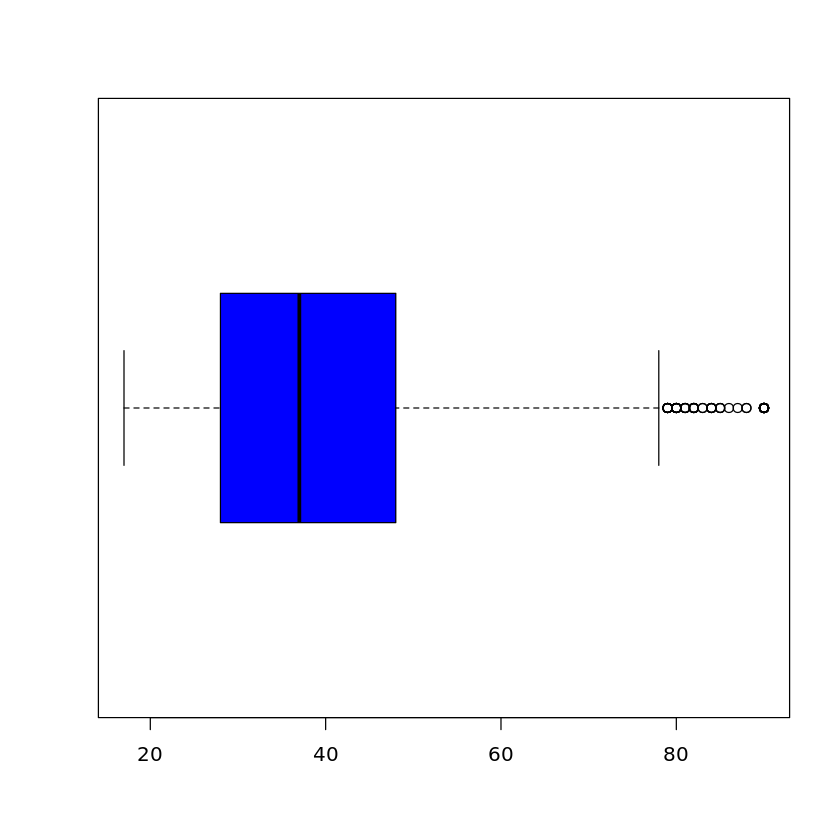

In [106]:
#Plotting boxplot in age feature
boxplot(data$age,horizontal = T, col='blue')

In [84]:
#Extracting an outliers from lower bound and upper bound using IQR methods
q1 <- quantile(data$age, 0.25)
q3 <- quantile(data$age, 0.75)
iqr <- q3 - q1
Outliers_lower_bound <- data$age[data$age<(q1-(1.5*iqr))]
Outliers_upper_bound <- data$age[data$age>(q3+(1.5*iqr))]

In [85]:
#Checking count of an outliers from lower bound
length(Outliers_lower_bound)

[1] 0

In [86]:
#Checking count of an outliers from upper bound
length(Outliers_upper_bound)

[1] 70

In [87]:
#Value count of age feature have an outliers
table(Outliers_upper_bound)

Outliers_upper_bound
79 80 81 82 83 84 85 86 87 88 90 
10 10  5  8  2  5  3  1  1  2 23 

### SUMMARY POINTS ON DETECTING OUTLIERS USING IQR RANGE METHOD ON AGE

- We have detected 70 rows as an outliers in age feature in which age has been recorded from 79 years old to 90 years old
- Age 90 is an extreme outliers which has 23 records

# SELECT ONLY RECORDS WITH AGE AT LEAST 80, AND CONSTRUCT A HISTOGRAM OF AGE. EXPLAIN WHAT YOU SEE

### SELECTING ONLY RECORDS WITH AGE ATLEAST 80 AND CREATE HISTOGRAM

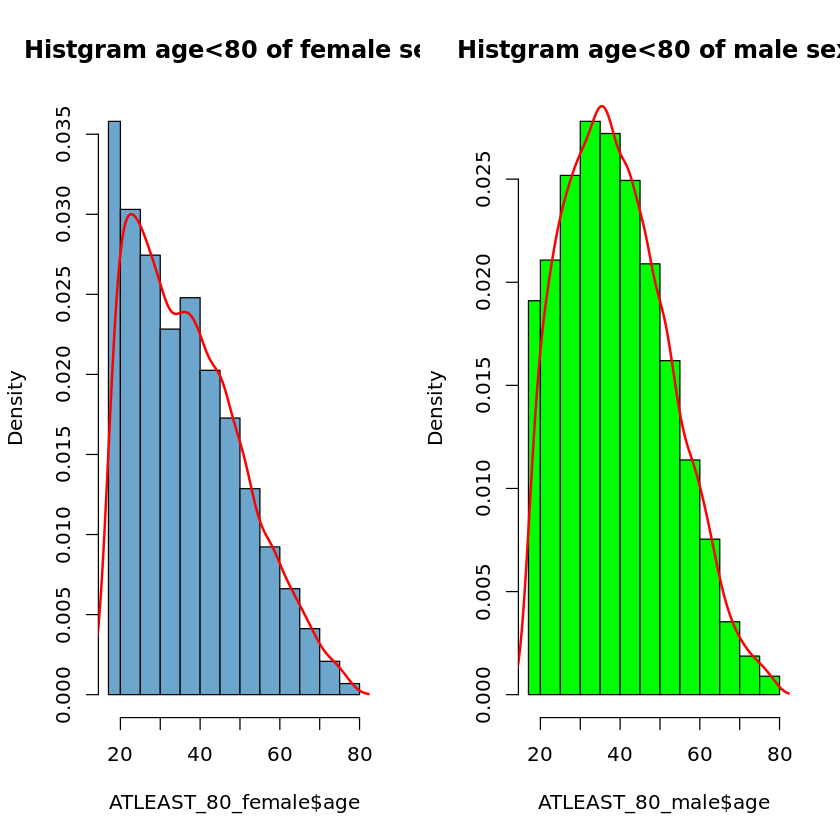

In [105]:
#Creating histogram on age w.r.t sex
ATLEAST_80_female <- filter(data, data$age<80 & data$sex=='Female')
ATLEAST_80_male <- filter(data, data$age<80 & data$sex=='Male')

breaks <- c(17,20,25,30,35,40,45,50,55,60,65,70,75,80)
par(mfrow = c(1, 2))
hist(ATLEAST_80_female$age, 
     freq = F, 
     main = "Histgram age<80 of female sex",
     breaks = breaks, 
     col = 'skyblue3')
density_f = density(ATLEAST_80_female$age)
lines(density_f, 
      lwd = 2, 
      col = "red")

hist(ATLEAST_80_male$age, 
     freq = F, 
     main = "Histgram age<80 of male sex",
     breaks = breaks, 
     col = 'green')
density_m = density(ATLEAST_80_male$age)
lines(density_m, lwd = 2, col = "red")

### SUMMARY ON HISTOGRAM: AGE ATLEAST 80

for male:

- The data spread is from about 17 age to 80 age.
- As per the above histogram, the data have right skewed it means maximum records have an age between 25 to 45 age
- Age 35 to 40 as an identified the peaks, which are the tallest clusters of the bars
- The peaks represent the most common values. Assess the spread of the sample to understand how much the data varies.

for female:

- As per the above histogram, the data have right skewed it means maximum records have an age between 17 to 45 age
- Age 20 to 30 as an identified the peaks, which are the tallest clusters of the bars

# END